# Punctuation
raw prompts without spell correction or expansions

In [4]:
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from helpers.occurences import count_occurrences, count_punctuation
from helpers.statistical_tests import run_t_test_on_gender

db_path = "../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT * FROM main.filtered_prompts", conn)
prompts = prompts.dropna(subset=['conversational'])
prompts = prompts[prompts['conversational'].str.strip() != '']
prompts = prompts.dropna(subset=['conversational'])
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6
...,...,...,...,...,...,...,...,...,...
750,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92
751,1845,37,user,\n nun möchte ich judgement balancing m...,\n nun möchte ich judgement balancing m...,,,Woman (cisgender),29
752,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,\n ich sehe keine veränderung im Plot. Was ...,,,Woman (cisgender),29
753,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8


## Combine prompts per user

In [5]:
user_prompts = (
    prompts.groupby(['user_id', 'gender'])['conversational']
    .apply(' '.join)
    .reset_index()
)

## Count punctuation occurences

In [6]:
from helpers.occurences import divide_counts

user_prompts['punctuation_counts'] = user_prompts['conversational'].apply(lambda x: count_punctuation(x))
user_prompts['n_words'] = user_prompts['conversational'].apply(lambda x: len(x.split()))
user_prompts['normalized_counts'] = user_prompts.apply(lambda row: divide_counts(row['punctuation_counts'], row['n_words']), axis=1)


In [7]:
user_prompts

,user_id,gender,conversational,punctuation_counts,n_words,normalized_counts
0,6,Man (cisgender),"parsing data from python iterator, how it coul...","{',': 2, ':': 5, ' ': 14, '.': 7, '-': 2, '(':...",196,"{',': 0.01020408163265306, ':': 0.025510204081..."
1,8,Man (cisgender),\n I am working on the problem of reconstru...,"{' ': 2, '.': 3}",36,"{' ': 0.05555555555555555, '.': 0.083333333333..."
2,11,Woman (cisgender),Can you adapt the following code so that inste...,"{'?': 10, ',': 2, ':': 3, '-': 3, '""': 4}",193,"{'?': 0.05181347150259067, ',': 0.010362694300..."
3,15,Man (cisgender),SET_ALL_TABLES action is currently not fetchin...,"{',': 2, '?': 2}",36,"{',': 0.05555555555555555, '?': 0.055555555555..."
4,16,Woman (cisgender),I want to use Dummy Hot encoding to replace th...,"{''': 24, ':': 10, ' ': 8, ',': 18, '?': 9, '""...",542,"{''': 0.04428044280442804, ':': 0.018450184501..."
5,25,Man (cisgender),whats the best way to encode and compress a ja...,"{',': 2, '-': 1, '?': 2, '.': 3}",107,"{',': 0.018691588785046728, '-': 0.00934579439..."
6,28,Woman (cisgender),I have a pandas dataframe like this:\n\nI want...,"{':': 7, ' ': 11, ',': 31, '?': 10, '!': 2, '""...",561,"{':': 0.012477718360071301, ' ': 0.01960784313..."
7,29,Woman (cisgender),\n nun möchte ich judgement balancing m...,"{' ': 4, '.': 3, ',': 1, '""': 2, '?': 2}",64,"{' ': 0.0625, '.': 0.046875, ',': 0.015625, '""..."
8,30,Non-binary,"as a NLP and LLM researcher, I am recently dow...","{',': 2, '.': 3, ' ': 2}",92,"{',': 0.021739130434782608, '.': 0.03260869565..."
9,31,Man (cisgender),How can I make use of an ObservableHQDatabaseC...,"{'(': 1, ')': 1, '?': 5, ' ': 2, '.': 1, ',': ...",92,"{'(': 0.010869565217391304, ')': 0.01086956521..."


## Fuse counts per gender

In [8]:
normalized_df = pd.json_normalize(user_prompts['normalized_counts'])
normalized_df['gender'] = user_prompts['gender']
normalized_df['user_id'] = user_prompts['user_id']

gender_means = normalized_df.groupby('gender').mean(numeric_only=True).dropna(axis=1, how='all')

In [9]:
gender_means

,",",:,\n,.,-,(,),?,"""",',[,],!,;,user_id
gender,,,,,,,,,,,,,,,
Another gender,0.027778,0.015873,0.007937,0.067460,NaN,0.003968,0.003968,0.015873,0.007937,NaN,NaN,NaN,NaN,NaN,84.000000
Man (cisgender),0.025079,0.016547,0.032339,0.048915,0.017965,0.007876,0.007712,0.029169,0.032050,0.013249,0.000770,0.000770,0.006612,0.001141,52.000000
Non-binary,0.021739,NaN,0.021739,0.032609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
Woman (cisgender),0.018602,0.012694,0.025001,0.026230,0.007576,0.004666,0.004730,0.031715,0.017161,0.012205,0.001845,0.001845,0.002099,0.000317,54.307692


## Plot (including zeros)

In [12]:
def box_plot(df, id_vars, bar_variables, x_label, y_label, hue_variable, palette):
    melted = df.melt(
    id_vars=id_vars,
    value_vars=bar_variables,
    var_name=x_label,
    value_name=y_label
)

    plt.figure(figsize=(8,6))
    sns.boxplot(
        data=melted,
        x=x_label,
        y=y_label,
        hue=hue_variable,
        palette=palette,
        width=0.7
    )

    plt.title(f'Counts and Scores by {hue_variable}')
    plt.ylabel('Average Count/Score Rate (per word)')
    plt.xlabel('Score/Count')
    plt.legend(title=hue_variable)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

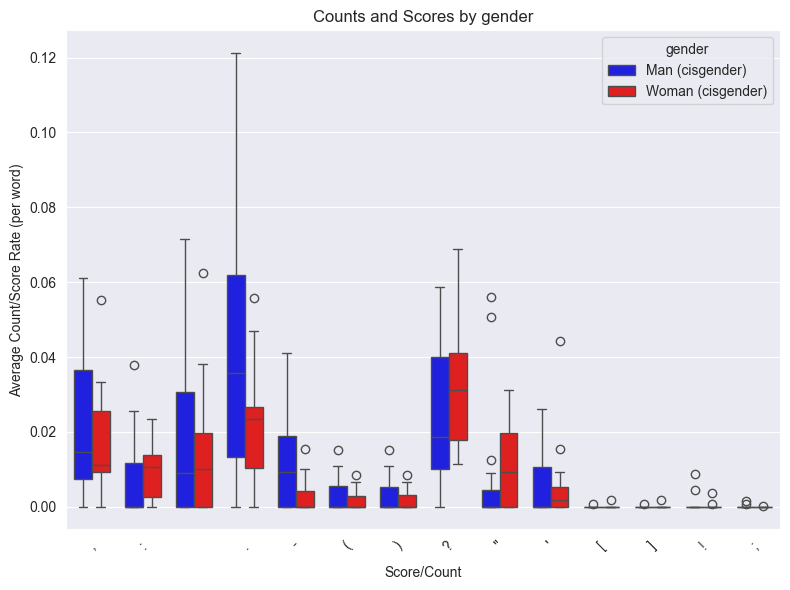

In [13]:
included = normalized_df[normalized_df['gender'].isin(['Woman (cisgender)', 'Man (cisgender)'])].reset_index(drop=True)
included = included.fillna(0)  # <-- This is key: replace NaN with 0 for all users who had no such punctuation

gender_palette = {'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'}

box_plot(included, ['user_id', 'gender'], punctuation_cols, 'Pronoun', 'Normalized Rate (100 Words)', 'gender', gender_palette)

## Compare

In [14]:
from statsmodels.stats.multitest import multipletests
from helpers.statistical_tests import compare_genders


def groupwise_comparison_with_correction(df, columns):
    stat_vals = []
    p_vals = []
    test_types = []
    female_vars = []
    male_vars = []
    nonzero_females = []
    nonzero_males = []
    for col in columns:
        stat_value, p_value, test_type, female_var, male_var, nonzero_female, nonzero_male = compare_genders(df, col)
        stat_vals.append(stat_value)
        p_vals.append(p_value)
        test_types.append(test_type)
        female_vars.append(female_var)
        male_vars.append(male_var)
        nonzero_females.append(nonzero_female)
        nonzero_males.append(nonzero_male)
    reject, pvals_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

    results = pd.DataFrame({
        'word': columns,
        'test type': test_types,
        'stat_value': stat_vals,
        'p_value': p_vals,
        'corrected p_value': pvals_corrected,
        'f_var': female_vars,
        'm_var': male_vars,
        'n_hits': [{'female': f, 'male': m} for f, m in zip(nonzero_females, nonzero_males)]
    })
    return results

In [17]:
results = groupwise_comparison_with_correction(included, punctuation_cols)
results = results.sort_values(by="p_value", ascending=True)
results

,word,test type,stat_value,p_value,corrected p_value,f_var,m_var,n_hits
4,-,U-test,142.000000,0.032675,0.396164,2.369572e-05,1.492901e-04,"{'female': 5, 'male': 10}"
3,.,T-test,2.019558,0.056595,0.396164,2.702823e-04,1.188488e-03,"{'female': 11, 'male': 13}"
8,"""",U-test,67.500000,0.131991,0.615960,1.139379e-04,3.454454e-04,"{'female': 8, 'male': 4}"
1,:,U-test,73.000000,0.254106,0.827887,5.652931e-05,1.290047e-04,"{'female': 10, 'male': 7}"
7,?,T-test,-0.906201,0.373162,0.827887,2.907904e-04,4.207068e-04,"{'female': 13, 'male': 13}"
5,(,U-test,114.000000,0.413943,0.827887,8.103944e-06,2.275994e-05,"{'female': 5, 'male': 7}"
6,),U-test,114.000000,0.413943,0.827887,8.167412e-06,2.250657e-05,"{'female': 5, 'male': 7}"
13,;,U-test,104.000000,0.606816,0.964317,7.718048e-09,1.807774e-07,"{'female': 1, 'male': 2}"
0,",",U-test,108.000000,0.644866,0.964317,2.190363e-04,3.809797e-04,"{'female': 12, 'male': 13}"
9,',U-test,89.000000,0.688798,0.964317,1.497348e-04,6.794517e-05,"{'female': 7, 'male': 6}"
